In [19]:
## Goal: Comparing the ztflc forced photometry lightcurve against the "normal" ZTF lightcurve
import numpy as np
import astropy.table as table
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# load the ztflc lc
ztflc = table.Table.read('../data/ztflc_forcefit.h5')
ztflc['mag'] = -2.5*np.log10(ztflc['ampl']) + ztflc['magzp']
ztflc

<ipython-input-5-dce62b56b25f>:3: RuntimeWarning: invalid value encountered in log10
  ztflc['mag'] = -2.5*np.log10(ztflc['ampl']) + ztflc['magzp']


<Table length=233>
      sigma             sigma.err      ...      target_y             mag        
     float64             float64       ...      float64            float64      
------------------ ------------------- ... ------------------ ------------------
14.472378378366585  0.4071467539468257 ...  2654.133020444947  17.92843142235579
 42.79852101731375   1.254812629594178 ... 2611.4216225853434                nan
 5.019048789272439  0.1453871691987656 ... 2654.5798502072016  17.06698341427242
 10.72947163499287 0.30589623511701863 ...  2642.114116817149                nan
 9.184468245595319  0.2636963406672404 ... 2665.7851881538063  16.50688421556592
10.144355640294936 0.28890516819398504 ... 2696.8115424759967 19.531541402611747
  6.79480734831998 0.18939070960168858 ... 2691.7963713021577 16.579059937463732
27.448735561223543  0.7884957167202911 ...  2612.230865263725  16.73858080126218
 7.826544860818549 0.22435069687094494 ... 2675.8265929543913  17.49342041118784
  5.14333568356807 0.14392711628327534 ... 2483.9120007313904                nan
               ...                 ... ...                ...                ...
13.004702445429384 0.37086223104520827 ...  2655.985362217852                nan
 7.644904310915697 0.22698969397311558 ...  2663.612826282741  19.63778653647585
 7.754619449369814 0.22235180405527463 ... 2661.2855406879685 16.613258936977317
10.157528553702546 0.28721683436054907 ...  1830.625461010669  16.43251314447032
12.328326975949324  0.3508564506937175 ... 1845.3641322071367 23.908572040948386
 38.67995149442595   1.130666960923682 ... 2463.6649266767117 23.801683114931272
15.083117302180508 0.43154350803086433 ...  2653.319945188249                nan
21.702311848491192  0.6198597401396926 ...  2633.878591297881 16.757525861392907
 11.17162574053698 0.31134426347099214 ...  2671.502965566031 21.616630116551768
 4.429017756876249 0.13089623320578814 ... 2613.2088222185594 22.522869909718985

In [23]:
# load the normal ZTF lc
ztfm_df = pd.read_hdf('../products/lc_interpolated_per_ins.h5')
ztfm_df['mjd'] = ztfm_df.index
ztfm = table.Table.from_pandas(ztfm_df)
ztfm

<Table length=160>
   mag_"g"_ZTF        magerr_"g"_ZTF    ...        mjd       
     float64             float64        ...      float64     
------------------ -------------------- ... -----------------
18.972152095874517 0.045186189642279086 ... 58716.38879999984
 18.72394989575024  0.03641126360777126 ... 58717.38879999984
  18.4827358757389  0.02995684387827056 ... 58718.38879999984
   18.250383503297 0.025511227536823788 ... 58719.38879999984
18.028631811898713  0.02263380483948045 ... 58720.38879999984
17.819061514899396 0.020817191204665866 ... 58721.38879999984
17.623074186767006 0.019606947387946754 ... 58722.38879999984
 17.44187492702611 0.018686550384229093 ... 58723.38879999984
17.276458838931926  0.01788596649665761 ... 58724.38879999984
 17.12760156272505 0.017143860677689308 ... 58725.38879999984
               ...                  ... ...               ...
19.650065096731144  0.14822780798157226 ... 58866.38879999984
19.665083332080297  0.14511006029488682 ... 58867.38879999984
19.679534170277584   0.1443382370118969 ... 58868.38879999984
 19.69332530418229  0.14621664863686512 ... 58869.38879999984
19.706365646092465  0.15112399062754378 ... 58870.38879999984
 19.71856660599808  0.15947386298061708 ... 58871.38879999984
 19.72984335978356  0.17164844134360105 ... 58872.38879999984
                --                   -- ... 58873.38879999984
                --                   -- ... 58874.38879999984
                --                   -- ... 58875.38879999984

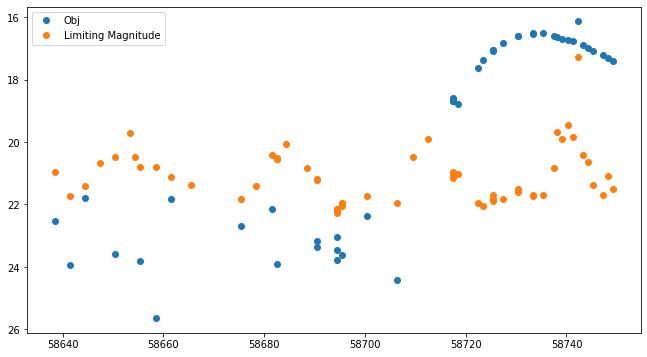

In [16]:
plt.figure(figsize=(11,6))
idx = np.logical_and(ztflc['filter'] == 'ZTF_g', ztflc['obsmjd'] < 58750)
plt.plot(ztflc['obsmjd'][idx], ztflc['mag'][idx], 'o', label='Obj')
plt.plot(ztflc['obsmjd'][idx], ztflc['maglim'][idx], 'o', label='Limiting Magnitude')
plt.legend()
plt.gca().invert_yaxis()

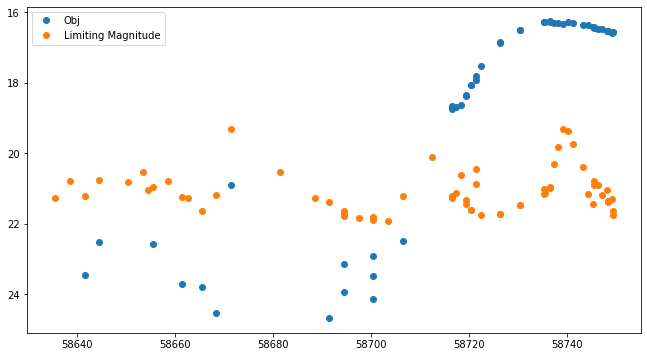

In [17]:
plt.figure(figsize=(11,6))
idx = np.logical_and(ztflc['filter'] == 'ZTF_r', ztflc['obsmjd'] < 58750)
plt.plot(ztflc['obsmjd'][idx], ztflc['mag'][idx], 'o', label='Obj')
plt.plot(ztflc['obsmjd'][idx], ztflc['maglim'][idx], 'o', label='Limiting Magnitude')
plt.legend()
plt.gca().invert_yaxis()

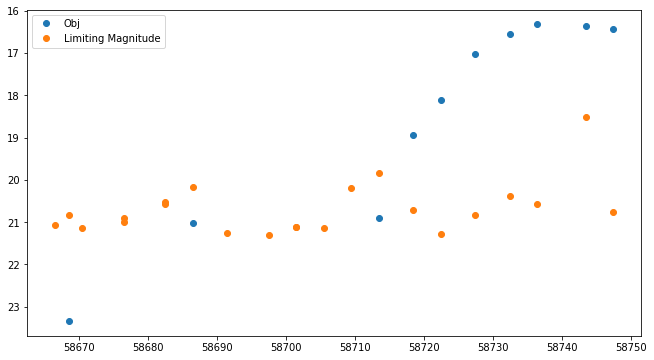

In [18]:
plt.figure(figsize=(11,6))
idx = np.logical_and(ztflc['filter'] == 'ZTF_i', ztflc['obsmjd'] < 58750)
plt.plot(ztflc['obsmjd'][idx], ztflc['mag'][idx], 'o', label='Obj')
plt.plot(ztflc['obsmjd'][idx], ztflc['maglim'][idx], 'o', label='Limiting Magnitude')
plt.legend()
plt.gca().invert_yaxis()

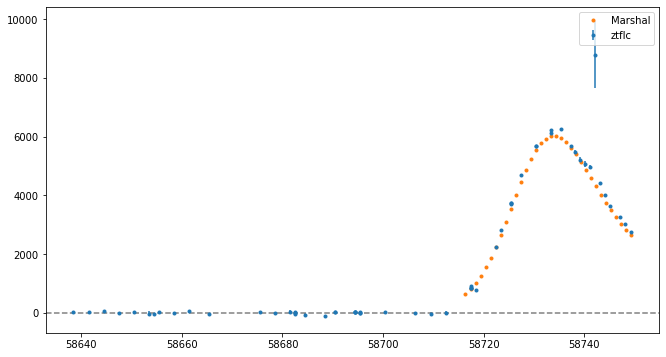

In [34]:
scalezp = 26
band = 'g'

plt.figure(figsize=(11,6))

# plot ztflc lc
idx = np.logical_and(ztflc['filter'] == ('ZTF_%s' % band), ztflc['obsmjd'] < 58750)
f0coef = 10 ** (-(ztflc["magzp"][idx] - scalezp) / 2.5)
plt.errorbar(ztflc['obsmjd'][idx], f0coef*ztflc['ampl'][idx], yerr=f0coef*ztflc['ampl.err'][idx], fmt='.', label='ztflc')

# plot marshal LC
idx = ztfm['mjd'] < 58750
ztf_flux = 10 ** (-(ztfm['mag_"%s"_ZTF' % band][idx] - scalezp)/2.5)
plt.plot(ztfm['mjd'][idx], ztf_flux, '.', label='Marshal')

plt.axhline(0, ls="--", color="0.5")
plt.legend()

In [35]:
scalezp = 26
band = 'r'

plt.figure(figsize=(11,6))

# plot ztflc lc
idx = np.logical_and(ztflc['filter'] == ('ZTF_%s' % band), ztflc['obsmjd'] < 58750)
f0coef = 10 ** (-(ztflc["magzp"][idx] - scalezp) / 2.5)
plt.errorbar(ztflc['obsmjd'][idx], f0coef*ztflc['ampl'][idx], yerr=f0coef*ztflc['ampl.err'][idx], fmt='.', label='ztflc')

# plot marshal LC
idx = ztfm['mjd'] < 58750
ztf_flux = 10 ** (-(ztfm['mag_"%s"_ZTF' % band][idx] - scalezp)/2.5)
plt.plot(ztfm['mjd'][idx], ztf_flux, '.', label='Marshal')

plt.axhline(0, ls="--", color="0.5")
plt.legend()

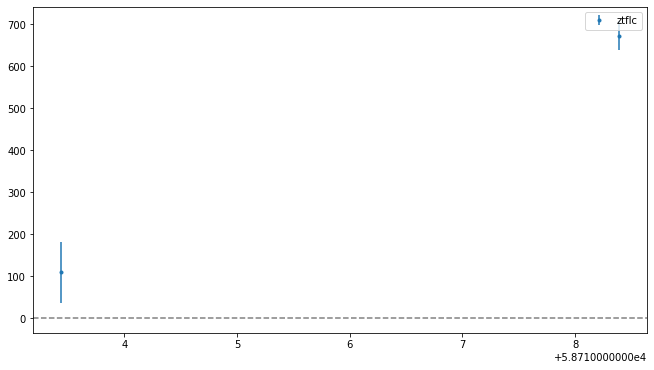

In [47]:
scalezp = 26
band = 'i'

plt.figure(figsize=(11,6))

# plot ztflc lc
idx = np.logical_and(ztflc['filter'] == ('ZTF_%s' % band), np.logical_and(ztflc['obsmjd'] > 58710, ztflc['obsmjd'] < 58722))
f0coef = 10 ** (-(ztflc["magzp"][idx] - scalezp) / 2.5)
plt.errorbar(ztflc['obsmjd'][idx], f0coef*ztflc['ampl'][idx], yerr=f0coef*ztflc['ampl.err'][idx], fmt='.', label='ztflc')

# plot marshal LC
idx = ztfm['mjd'] < 58722
ztf_flux = 10 ** (-(ztfm['mag_"%s"_ZTF' % band][idx] - scalezp)/2.5)
#plt.plot(ztfm['mjd'][idx], ztf_flux, '.', label='Marshal')

plt.axhline(0, ls="--", color="0.5")
plt.legend()

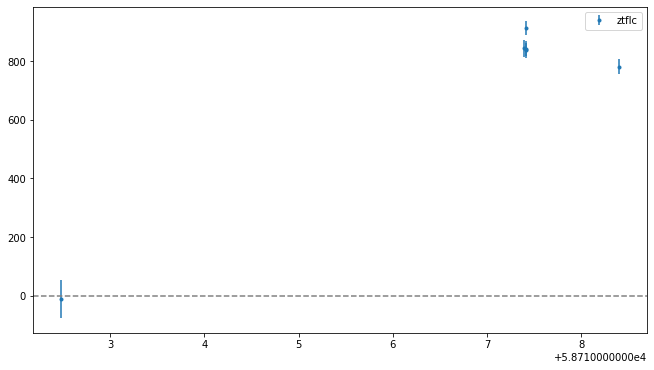

In [48]:
scalezp = 26
band = 'g'

plt.figure(figsize=(11,6))

# plot ztflc lc
idx = np.logical_and(ztflc['filter'] == ('ZTF_%s' % band), np.logical_and(ztflc['obsmjd'] > 58710, ztflc['obsmjd'] < 58722))
f0coef = 10 ** (-(ztflc["magzp"][idx] - scalezp) / 2.5)
plt.errorbar(ztflc['obsmjd'][idx], f0coef*ztflc['ampl'][idx], yerr=f0coef*ztflc['ampl.err'][idx], fmt='.', label='ztflc')

# plot marshal LC
idx = ztfm['mjd'] < 58725
ztf_flux = 10 ** (-(ztfm['mag_"%s"_ZTF' % band][idx] - scalezp)/2.5)
#plt.plot(ztfm['mjd'][idx], ztf_flux, '.', label='Marshal')

plt.axhline(0, ls="--", color="0.5")
plt.legend()

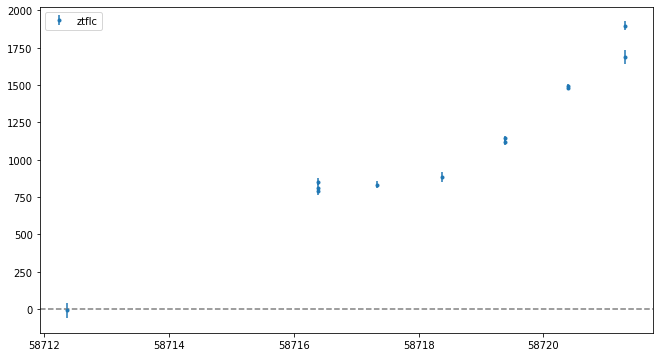

In [49]:
scalezp = 26
band = 'r'

plt.figure(figsize=(11,6))

# plot ztflc lc
idx = np.logical_and(ztflc['filter'] == ('ZTF_%s' % band), np.logical_and(ztflc['obsmjd'] > 58710, ztflc['obsmjd'] < 58722))
f0coef = 10 ** (-(ztflc["magzp"][idx] - scalezp) / 2.5)
plt.errorbar(ztflc['obsmjd'][idx], f0coef*ztflc['ampl'][idx], yerr=f0coef*ztflc['ampl.err'][idx], fmt='.', label='ztflc')

# plot marshal LC
idx = ztfm['mjd'] < 58725
ztf_flux = 10 ** (-(ztfm['mag_"%s"_ZTF' % band][idx] - scalezp)/2.5)
#plt.plot(ztfm['mjd'][idx], ztf_flux, '.', label='Marshal')

plt.axhline(0, ls="--", color="0.5")
plt.legend()

In [50]:
idx = np.logical_and(ztflc['filter'] == ('ZTF_%s' % 'i'), ztflc['obsmjd'] > 58710)
ztflc[idx]

<Table length=9>
      sigma             sigma.err      ...      target_y             mag        
     float64             float64       ...      float64            float64      
------------------ ------------------- ... ------------------ ------------------
  6.79480734831998 0.18939070960168858 ... 2691.7963713021577 16.579059937463732
 5.828631359812823 0.16391005527455907 ... 2660.5341202136806  18.93010418797646
 4.439536143181822 0.12680451011733387 ...  2658.495875165455  18.10096741821412
  7.28290644338093 0.20165071660270315 ...  2673.363585484459  16.43125254168786
 6.210032530812227 0.17539323976443985 ...  2654.457083078443  17.02452844937144
14.252391633393717  0.4053321702141802 ... 2631.2616654455032 20.908904460149902
  9.58939690918232 0.27216555821698296 ... 2668.1222293604606  16.32224701631279
 6.363343591684859 0.17524578613752267 ... 2632.6819975134636 16.544847487508886
12.826513038755355  0.3621066487360298 ... 2641.0628946727556 16.370340569733205